In [60]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

In [61]:
#import and check dataset
df_all=pd.read_csv('ward-atlas-data-simpleversion.csv')
df_all.head()

,Codes,New Code,Borough,Names,Population and Age; Population Estimates and Projections; 2001,Population and Age; Population Estimates and Projections; 2006,Population and Age; Population Estimates and Projections; 2011,Population and Age; Population Estimates and Projections; 2013,Population and Age; Population Estimates and Projections; 2014,Population and Age; Population Estimates and Projections; 2015,...,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2007/2008,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2008/2009,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2009/2010,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2010/2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012,Election turnout; Turnout Borough election; 2006,Election turnout; Turnout Borough election; 2010,Election turnout; Turnout Borough election; 2014,Election turnout; Turnout Mayoral election; 2008,Election turnout; Turnout Mayoral election; 2012
0,00AA,E09000001,City of London,City of London,7350,7254,7400,7993,8043,8102,...,800,730,580,780,805,NaN,NaN,NaN,47.6,48.500000
1,00ABFX,E05000026,Barking and Dagenham,Abbey,10350,10239,12900,13806,14283,14739,...,845,855,1050,1370,1000,29.9,58.1,36.82,35.6,25.688941
2,00ABFY,E05000027,Barking and Dagenham,Alibon,9350,9236,10450,10527,10563,10587,...,160,215,190,260,190,41.1,59.2,34.27,34.4,20.347925
3,00ABFZ,E05000028,Barking and Dagenham,Becontree,11550,11238,11650,12155,12428,12688,...,265,295,350,400,320,32.4,60.2,36.84,33.4,22.538211
4,00ABGA,E05000029,Barking and Dagenham,Chadwell Heath,9400,9387,10100,10261,10337,10400,...,130,145,135,160,155,36.2,61.4,36.50,36.6,25.318814


In [50]:
#creat dataframe 
df = df_all[['New Code','Borough','Names','Diversity; Ethnic Group 5 groups - 2011 Census; White','Diversity; Ethnic Group 5 groups - 2011 Census; Mixed',
          'Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British',
         'Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British',
         'Diversity; Ethnic Group 5 groups - 2011 Census; Other',
          'House Prices; Median House Price; 2011','Population and Age; All ages; 2011']
         ]
#rename the columns (orginal is too complex)
cols = df.columns.values
cols[ 3] = 'White'
cols[ 4] = 'Mixed'
cols[5] = 'Asian_or_Asian_British'
cols[6] = 'Black_British'
cols[7] = 'Other'
cols[8] = 'Median_House_Price'
cols[9] ='Population'
df.columns = cols
#data processing - the percent of each race group in total population 
df['White_per'] = df['White']/df['Population']
df['Mixed_per']= df['Mixed']/df['Population']
df['Asian_or_Asian_British_per'] = df['Asian_or_Asian_British']/df['Population']
df['Black_British_per']= df['Black_British']/df['Population']
df['Other_per'] = df['Other']/df['Population']

#data for regression after processing 
data=df[['Names','Median_House_Price','White_per','Mixed_per','Asian_or_Asian_British_per','Black_British_per','Other_per']]
data=data.set_index('Names')

/tmp/ipykernel_65/1854561743.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['White_per'] = df['White']/df['Population']
/tmp/ipykernel_65/1854561743.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mixed_per']= df['Mixed']/df['Population']
/tmp/ipykernel_65/1854561743.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [62]:
data

,Median_House_Price,White_per,Mixed_per,Asian_or_Asian_British_per,Black_British_per,Other_per
Names,,,,,,
City of London,13.049793,0.782380,0.038991,0.126821,0.026039,0.020777
Abbey,12.083905,0.276573,0.044993,0.432164,0.201584,0.028073
Alibon,11.982929,0.695374,0.034601,0.071019,0.181610,0.010036
Becontree,12.043554,0.585360,0.045180,0.173220,0.176582,0.015089
Chadwell Heath,12.180755,0.619859,0.047107,0.155363,0.158650,0.017030
...,...,...,...,...,...,...
Tachbrook,13.151922,0.779272,0.033244,0.092154,0.052921,0.039477
Vincent Square,13.304685,0.706465,0.045937,0.125300,0.072158,0.049740
Warwick,13.287878,0.759113,0.039011,0.099233,0.052547,0.048710


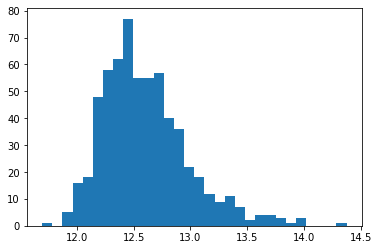

In [63]:
#Check Normal Distribution of housing price
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(data['Median_House_Price'], 30)
plt.show()

In [64]:
d2=np.log(data['Median_House_Price'])

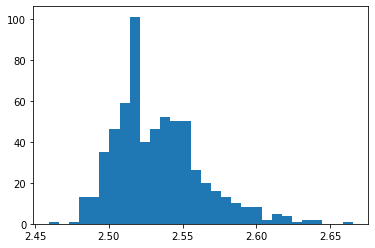

In [65]:
#Normal distribution after log
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(d2, 30)
plt.show()

In [66]:
#substitute it
data['Median_House_Price']=d2

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [58]:
# using VIF on the bike_rental dataset
data_race = drop_column_using_vif_(data.drop('Median_House_Price', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(data_race.columns)

Dropping: White_per
The columns remaining after VIF selection are:
Index(['Mixed_per', 'Asian_or_Asian_British_per', 'Black_British_per',
       'Other_per'],
      dtype='object')


In [67]:
#multiple regression
housing_race = sm.OLS(endog=data[['Median_House_Price']], exog=sm.add_constant(data_race)).fit()
housing_race.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     160.2
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           4.54e-94
Time:                        17:03:04   Log-Likelihood:                 1530.1
No. Observations:                 625   AIC:                            -3050.
Df Residuals:                     620   BIC:                            -3028.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.5179      0.003    734.500      0.000       2.511       2.525
Mixed_per                      0.8132      0.082      9.961      0.000       0.653       0.974
Asian_or_Asian_British_per    -0.0321      0.006     -5.350      0.000      -0.044      -0.020
Black_British_per             -0.2482      0.012    -20.396      0.000      -0.272      -0.224
Other_per                      0.3832      0.037     10.458      0.000       0.311       0.455
==============================================================================
Omnibus:                       59.860   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.159
Skew:                           0.744   Prob(JB):                     6.47e-18
Kurtosis:                       3.907   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

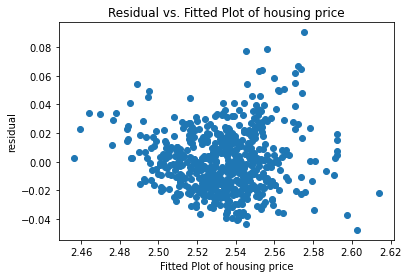

In [68]:
# plot 
plt.scatter(housing_race.fittedvalues,housing_race.resid)
# adding title and labels
plt.xlabel('Fitted Plot of housing price')
plt.ylabel('residual')
plt.title('Residual vs. Fitted Plot of housing price')
plt.show()